<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/Svm_manipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Import dataset and drop one classifier data to make it binary classifier.

In [0]:
df=pd.read_csv('/content/Iris.csv')
df=df.drop(['Id'],axis=1)
target=df['Species']
#s=set()
#for val in target:
#  s.add(val)
#s=list(s)
#rows=list(range(100,150))
#df=df.drop(df.index[rows])

Plot the data using only two features. x and y in below code are only for plot purpose. 

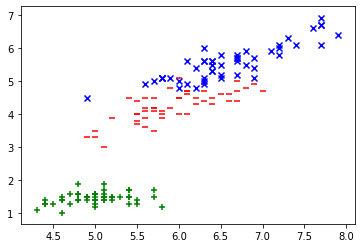

In [463]:
xp=df['SepalLengthCm']
yp=df['PetalLengthCm']
setosa_x=xp[:50]
setosa_y=yp[:50]
versicolor_x=xp[50:100]
versicolor_y=yp[50:100]
virginica_x=xp[100:]
virginica_y=yp[100:]
plt.scatter( setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.scatter(virginica_x,virginica_y, marker='x',color='blue')

Now shuffle the data set and split it into train and test set. Then convert these sets as numpy arrays.

In [0]:
df=df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

In [0]:
target=df['Species']
y_original=[]
for val in target:
  if val=='Iris-setosa':
    y_original.append(-1)
  else:
    y_original.append(1)



In [0]:
df=df.drop(['Species'],axis=1)

In [0]:
X_original=[]
X_original=df.values.tolist()

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
X,y=shuffle(X_original,y_original)
X_train=[]
X_test=[]
y_train=[]
y_test=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9)

In [0]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [0]:
y_train=y_train.reshape(135,1)
y_test=y_test.reshape(15,1)

Train the weights using the data.

In [0]:
train_f1=X_train[:,0]
train_f2=X_train[:,1]
train_f1=train_f1.reshape(135,1)
train_f2=train_f2.reshape(135,1)

In [0]:
#w1=np.zeros((90,1))
#w2=np.zeros((90,1))
w1=np.zeros((2,1))

In [0]:
def train(X_f,w_f,y_f):
  epoch=1
  alpha=0.0001
  while epoch<10000:
    #res=w1*train_f1+w2*train_f2
    res=np.matmul(X_f,w_f)
    prod=res*y_f
    count=0
    for val in prod:
      if(val>=1):
        cost=0
      #w1=w1-alpha*((1/epoch)*w1)
      #w2=w2-alpha*((1/epoch)*w2)
        w_f=w_f-alpha*((1/epoch)*w_f)
      else:
        cost=1-val
        #w1=w1+alpha*(y_train[count]*train_f1[count]-((1/epoch)*w1))
        #w2=w2+alpha*(y_train[count]*train_f2[count]-((1/epoch)*w2))
        w_f[0,0]=w_f[0,0]+alpha*(y_f[count]*X_f[count,0]-((1/epoch)*w_f[0,0]))
        w_f[1,0]=w_f[1,0]+alpha*(y_f[count]*X_f[count,1]-((1/epoch)*w_f[1,0]))
      count+=1
    epoch+=1
  return w_f

In [475]:
w1=train(X_train,w,y_train)
w1

array([[-1.04069225],
       [ 2.10257552]])

In [476]:
np.matmul(X_test,w1)

array([[ 5.11399252],
       [-2.78020164],
       [-2.15366719],
       [ 5.4262002 ],
       [ 5.11399252],
       [-2.77808254],
       [ 2.38276345],
       [ 3.52964402],
       [ 2.69497112],
       [ 5.01628061],
       [ 2.38064435],
       [ 2.59725921],
       [ 3.32574378],
       [ 2.26597961],
       [ 4.90161587]])

In [477]:
y_test

array([[ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1]])

In [478]:
df

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [0]:
df1=pd.read_csv('/content/Iris.csv')
df1=df1.drop(['Id'],axis=1)
target=df1['Species']
s=set()
for val in target:
  s.add(val)
s=list(s)
rows=list(range(0,50))
df1=df1.drop(df1.index[rows])

In [0]:
y1=[]
for val in df1['Species']:
  if(val=='Iris-versicolor'):
    y1.append(-1)
  else:
    y1.append(1)

In [0]:
df1.drop(['SepalWidthCm','PetalWidthCm','Species'],axis=1,inplace=True)

In [0]:
X1=[]
X1=df1.values.tolist()

In [0]:
X1,y1=shuffle(X1,y1)
X_train1=[]
X_test1=[]
y_train1=[]
y_test1=[]
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,train_size=0.9)

In [0]:
X_train1=np.array(X_train1)
X_test1=np.array(X_test1)
y_train1=np.array(y_train1)
y_test1=np.array(y_test1)

In [0]:
y_train1=y_train1.reshape(90,1)
y_test1=y_test1.reshape(10,1)

In [0]:
w2=np.zeros((2,1))

In [0]:
w2=train(X_train1,w2,y_train1)

In [527]:
w2

array([[-3.21563737],
       [ 4.10971652]])

In [528]:
np.matmul(X_test1,w2)

array([[ 0.6837668 ],
       [ 2.75589713],
       [-2.19455857],
       [ 2.43433339],
       [-1.24713942],
       [-1.06832359],
       [-3.17652184],
       [-3.1937939 ],
       [-1.694179  ],
       [-1.97967481]])

In [529]:
y_test1

array([[ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]])

**Now classify the whole data.**

In [0]:
X_final=np.array(X_original)
Y_final=np.array(y_original).reshape(150,1)

In [0]:
fin1=np.matmul(X_final,w1)

In [0]:
X_final[np.where(fin1<-1)[0]]=0

In [530]:
np.matmul(X_final,w2)

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

**Classify the Kaggle test data.**

In [0]:
kg=pd.read_csv('/content/testing.csv')

In [0]:
kg.drop(['sepal_width','petal_width'],axis=1,inplace=True)

In [0]:
X_kg=[]
X_kg=np.array(kg.values.tolist())

In [0]:
kg_res=np.matmul(X_kg,w1)

In [0]:
X_kg[np.where(kg_res<-1)[0]]=0

In [0]:
kg_res=np.matmul(X_kg,w2)

In [0]:
kg_res

In [0]:
sub=[]
for a in kg_res:
  if(a==0):
    sub.append('Iris-setosa')
  else:
    if(a<=0):
      sub.append('Iris-versicolor')
    else:
      sub.append('Iris-virginica')

In [533]:
sub

['Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-s